In [1]:
from tinc import *
tclient = TincClient()

Connected to localhost:34450. Server version 1 revision 0
C:\Users\Andres\source\repos\casm_viewer\bin\
history_0.json
C:\Users\Andres\source\repos\casm_viewer\bin\
trajectory_0.json
C:\Users\Andres\source\repos\casm_viewer\bin\
positions_0.nc


# Parameters and Parameter Spaces

In [2]:
[p.id for p in tclient.parameters]

['ShellSiteTypes',
 'PercolationTypes',
 'markerColor',
 'markerScale',
 'percoMarkerScaleFactor',
 'currentSelection',
 'previousSelection',
 'dataset',
 'alpha',
 'width',
 'alpha',
 'width',
 'atomMarkerSize',
 'dataScale',
 'showAtoms',
 'alpha',
 'SlicingPlaneCorner',
 'SlicingPlaneSize',
 'SliceNormal',
 'SlicingPlaneThickness',
 'SliceRotationPitch',
 'SliceRotationYaw',
 'SliceRotationRoll',
 'clippedMultiplier',
 'time',
 'param_chem_pot(a)',
 'param_chem_pot(b)',
 'T']

In [3]:
tclient.get_parameter("param_chem_pot(a)").value

3.799999952316284

In [4]:
tclient.get_parameter("param_chem_pot(a)").values

array([3.79999995, 3.79999995, 3.9000001 , 3.9000001 ])

In [5]:
tclient.get_parameter("param_chem_pot(a)").ids

['A_3.8B_-19.8/', 'A_3.8B_-19.9/', 'A_3.9B_-19.8/', 'A_3.9B_-19.9/']

In [6]:
[ps.id for ps in tclient.parameter_spaces]

['casmParameters']

In [7]:
tclient.parameter_spaces[0].get_current_relative_path()

'A_3.8B_-19.8\\conditions.0\\'

In [8]:
tclient.parameter_spaces[0].get_root_path()

'C:\\Users\\Andres\\source\\repos\\vdv_data\\nbO_2chempot\\'

# Datapools

Through TINC you can access the data from the results file through the data pool interface.

In [9]:
[dp.id  for dp in tclient.datapools]

['resultsData', 'trajectories', 'neighborhood']

In [10]:
results_pool = tclient.get_datapool("resultsData")

In [11]:
results_pool.get_current_files()

['C:\\Users\\Andres\\source\\repos\\vdv_data\\nbO_2chempot\\A_3.8B_-19.8\\results.json']

In [12]:
import json
with open(results_pool.get_current_files()[0]) as f:
    j = json.load(f)

In [13]:
j.keys()

dict_keys(['<atom_frac(Nb)>', '<atom_frac(O)>', '<comp(a)>', '<comp(b)>', '<comp_n(Nb)>', '<comp_n(O)>', '<comp_n(Va)>', '<formation_energy>', '<potential_energy>', '<site_frac(Nb)>', '<site_frac(O)>', '<site_frac(Va)>', 'Beta', 'N_avg_samples', 'N_equil_samples', 'T', 'heat_capacity', 'is_converged', 'is_equilibrated', 'param_chem_pot(a)', 'param_chem_pot(b)', 'prec(<atom_frac(Nb)>)', 'prec(<atom_frac(O)>)', 'prec(<comp(a)>)', 'prec(<comp(b)>)', 'prec(<comp_n(Nb)>)', 'prec(<comp_n(O)>)', 'prec(<comp_n(Va)>)', 'prec(<formation_energy>)', 'prec(<potential_energy>)', 'prec(<site_frac(Nb)>)', 'prec(<site_frac(O)>)', 'prec(<site_frac(Va)>)', 'susc_n(Nb,Nb)', 'susc_n(Nb,O)', 'susc_n(Nb,Va)', 'susc_n(O,O)', 'susc_n(S,Nb)', 'susc_n(S,O)', 'susc_n(S,Va)', 'susc_n(Va,O)', 'susc_n(Va,Va)', 'susc_x(S,a)', 'susc_x(S,b)', 'susc_x(a,a)', 'susc_x(a,b)', 'susc_x(b,b)'])

A data pool allows slicing the dataset in an arbitrary dimension

In [14]:
slice = results_pool.get_slice("<site_frac(Nb)>", "T")

In [15]:
slice_2 = results_pool.get_slice("<site_frac(O)>", "T")

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Andres\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'interactive']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


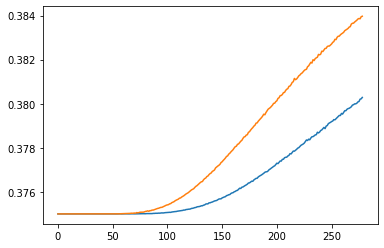

In [17]:
plot(slice)
plot(slice_2)

# Parameter Callbacks

Create a parameter through the TINC client. All parameters assigned to the "casm" group will be displayed in the CASM viewer interface.

In [18]:
p = tclient.create_parameter(Parameter,\
                                    "myparam","casm",-0.375,0.375,\
                                    [-0.375,-0.125,0.125,0.375],0.125)

In [19]:
p.value

0.125

In [20]:
p.value = 0.125

In [21]:
def func(value):
    print(value)    

Register the func as a callback to the 'p' parameter. This function will be called whenever the parameter value changes, whether from the C++ GUI or from this notebook.

In [22]:
p.register_callback(func)

In [23]:
p.value = 0.1

0.125


In [24]:
q = tclient.create_parameter(Parameter,\
                                 "output","casm",-10,10)

In [25]:
def func(value):
    print(value)
    q.value = value * 3 +1 

Even though it has the same name, we must register the function.

In [26]:
p.register_callback(func)

```Trigger``` parameters are displayed as buttons in the GUI.

In [27]:
t = tclient.create_parameter(Trigger,\
                                    "compute","casm")

In [28]:
def compute(value):
    print("hello")

In [29]:
t.register_callback(compute)

```ParameterString``` parameters are used to display text.

In [30]:
s = tclient.create_parameter(ParameterString,\
                                    "text","casm")

In [31]:
s.value

''

In [32]:
s.value = "hello CASM"

# Generating a graph

In [ ]:
[db.id for db in tclient.disk_buffers]

In [ ]:
g = tclient.get_disk_buffer("graph3")

In [ ]:
def graph(value):
    x=np.linspace(0,1,10);
    y=np.random.random(10);
    plt.plot(x,y);
    plt.title(os.getcwd().split("/")[-1].replace("_",":"));
    name = g.get_filename_for_writing()
    plt.savefig(name);
    g.done_writing_file(name)

Register the ```graph()``` function to the "compute" trigger. Whenever the button is clicked, a new graph will be generated

In [ ]:
t.register_callback(graph)

# Atom buffers

In [33]:
buf = tclient.get_disk_buffer("atomRender_buffer")

The data by 

In [34]:
buf.data

array([ 0.        ,  2.1307285 ,  2.1307285 , ..., 23.438013  ,
       21.307285  ,  0.33333334], dtype=float32)

In [35]:
buf.data = [0,0,0,0.5, 10, 10, 10, 0.9]

C:\Users\Andres\source\repos\casm_viewer\bin\
positions_1.nc
